## Problem Statement: Prepare a prediction model for profit of 50_startups data.
### Do transformations for getting better predictions of profit and
### make a table containing R^2 value for each prepared model.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r"C:\Users\abhil\Downloads\50_Startups.csv")

## EDA

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.skew()

C:\Users\abhil\AppData\Local\Temp\ipykernel_2404\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [8]:
df.kurt()

C:\Users\abhil\AppData\Local\Temp\ipykernel_2404\1257127604.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

In [9]:
df.corr()

C:\Users\abhil\AppData\Local\Temp\ipykernel_2404\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


C:\Users\abhil\AppData\Local\Temp\ipykernel_2404\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

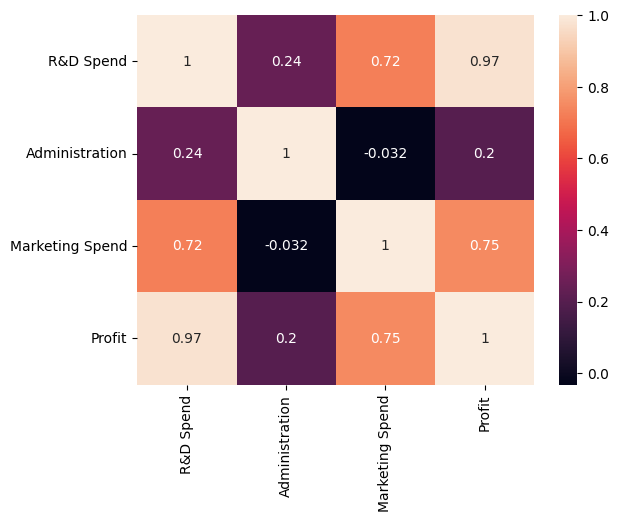

In [10]:
sns.heatmap(df.corr(), annot=True)

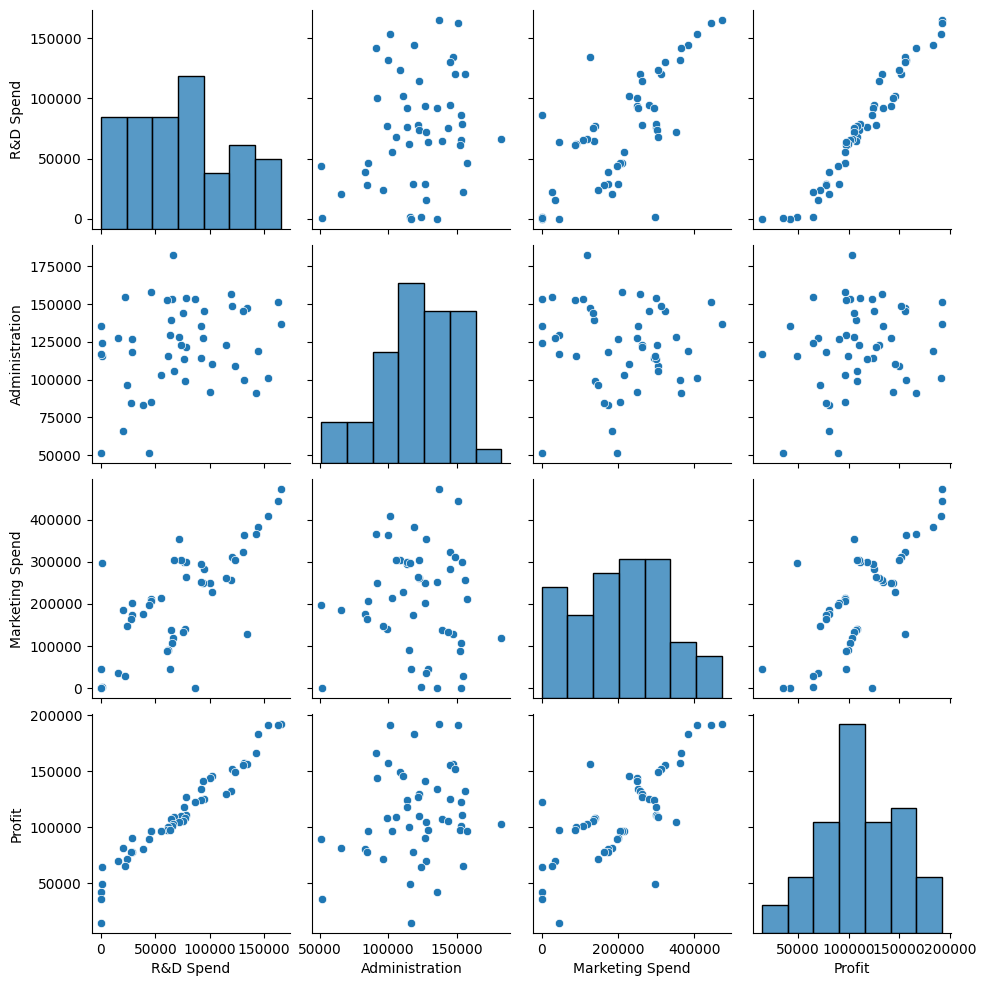

In [11]:
sns.pairplot(df)

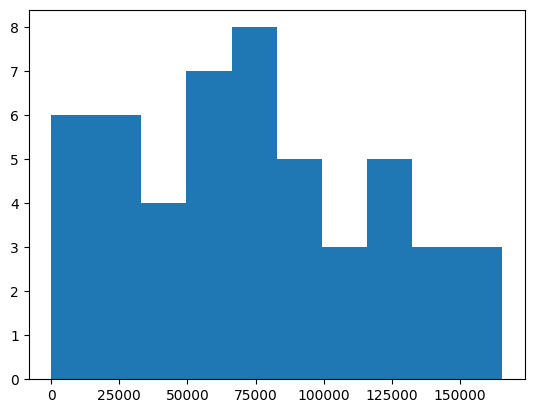

<Figure size 640x480 with 0 Axes>

In [12]:
plt.hist(df['R&D Spend'])
plt.show()
plt.tight_layout()

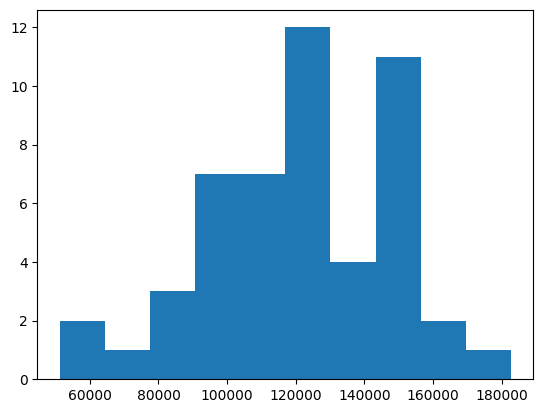

<Figure size 640x480 with 0 Axes>

In [13]:
plt.hist(df['Administration'])
plt.show()
plt.tight_layout()

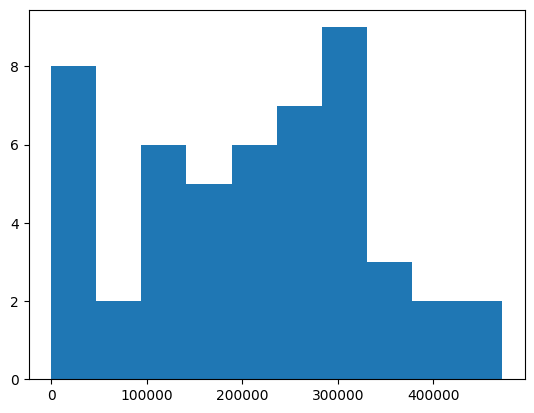

<Figure size 640x480 with 0 Axes>

In [14]:
plt.hist(df['Marketing Spend'])
plt.show()
plt.tight_layout()

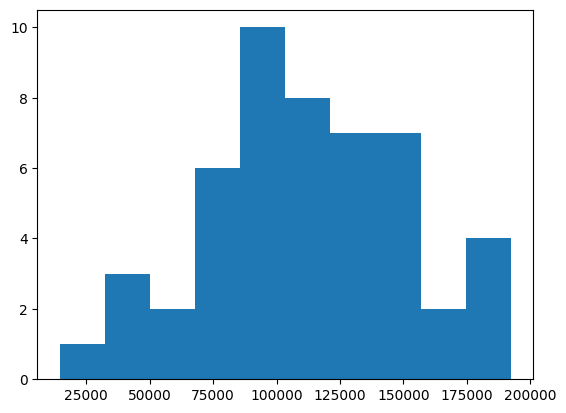

<Figure size 640x480 with 0 Axes>

In [15]:
plt.hist(df['Profit'])
plt.show()
plt.tight_layout()

In [16]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [17]:
df.rename(columns={'R&D Spend':'RDSpend','Marketing Spend':'Marketing_Spend'}, inplace = True)

In [18]:
df.columns

Index(['RDSpend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [19]:
# Model Building
model = smf.ols('Profit~RDSpend+Administration+Marketing_Spend+State',data=df).fit()

In [20]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
RDSpend                  0.806023
Administration          -0.027004
Marketing_Spend          0.026980
dtype: float64

In [22]:
model.tvalues , np.round(model.pvalues,5)

(Intercept             7.280560
 State[T.Florida]      0.058970
 State[T.New York]    -0.012864
 RDSpend              17.368580
 Administration       -0.517012
 Marketing_Spend       1.573889
 dtype: float64,
 Intercept            0.00000
 State[T.Florida]     0.95324
 State[T.New York]    0.98979
 RDSpend              0.00000
 Administration       0.60774
 Marketing_Spend      0.12268
 dtype: float64)

In [23]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.9507524843355148, 0.945156175737278)

#### Build SLR and MLR models for insignificant variables 'Administration' and 'Marketing_Spend'
#### Also find their tvalues and pvalues

In [25]:
slr_a=smf.ols("Profit~Administration",data=df).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [26]:
slr_m=smf.ols("Profit~Marketing_Spend",data=df).fit()
slr_m.tvalues , slr_m.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [28]:
mlr_am=smf.ols("Profit~Administration+Marketing_Spend",data=df).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64,
 Intercept          2.589341e-01
 Administration     1.729198e-02
 Marketing_Spend    9.727245e-11
 dtype: float64)

### Model Validation
### Techniques: Collinearity Check & Residual Analysis

In [30]:
rsq_r=smf.ols("RDSpend~Administration+Marketing_Spend",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDSpend+Marketing_Spend",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing_Spend~RDSpend+Administration",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDSpend','Administration','Marketing_Spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDSpend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


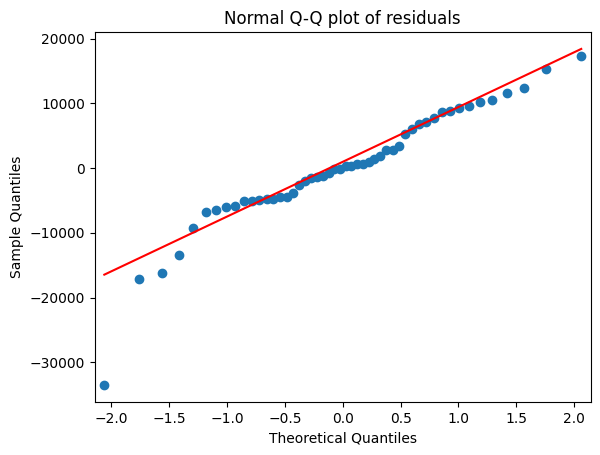

In [31]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [32]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Model Deletion Diagnostics (checking Outliers or Influencers)

### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [34]:
(c,_)=model.get_influence().cooks_distance
c

array([7.67941282e-06, 3.96002384e-03, 2.78948395e-02, 2.35705108e-02,
       1.40231490e-02, 1.17098970e-02, 2.49314176e-03, 4.16542624e-03,
       7.29467176e-05, 6.31415598e-03, 2.21391699e-02, 1.93512168e-02,
       2.13263552e-02, 7.40092001e-03, 7.20165958e-02, 4.34157410e-02,
       1.57591120e-02, 4.33058862e-03, 3.43997076e-03, 3.28909738e-02,
       7.03247647e-04, 1.17002661e-02, 3.52541534e-03, 3.68801928e-04,
       5.07030667e-03, 4.16365620e-03, 5.79414020e-03, 3.25030423e-02,
       1.07438091e-03, 1.14685871e-04, 2.67092819e-05, 4.26003186e-06,
       6.55180125e-04, 2.69550649e-04, 2.09894518e-02, 8.32171521e-03,
       5.92471519e-02, 7.19280440e-05, 5.58017593e-02, 1.60830329e-03,
       2.27122555e-03, 2.19513492e-03, 1.66164967e-04, 2.33988898e-02,
       1.16697070e-04, 9.43947846e-02, 4.23233340e-02, 4.48153392e-03,
       1.56376134e-01, 2.63959436e-01])

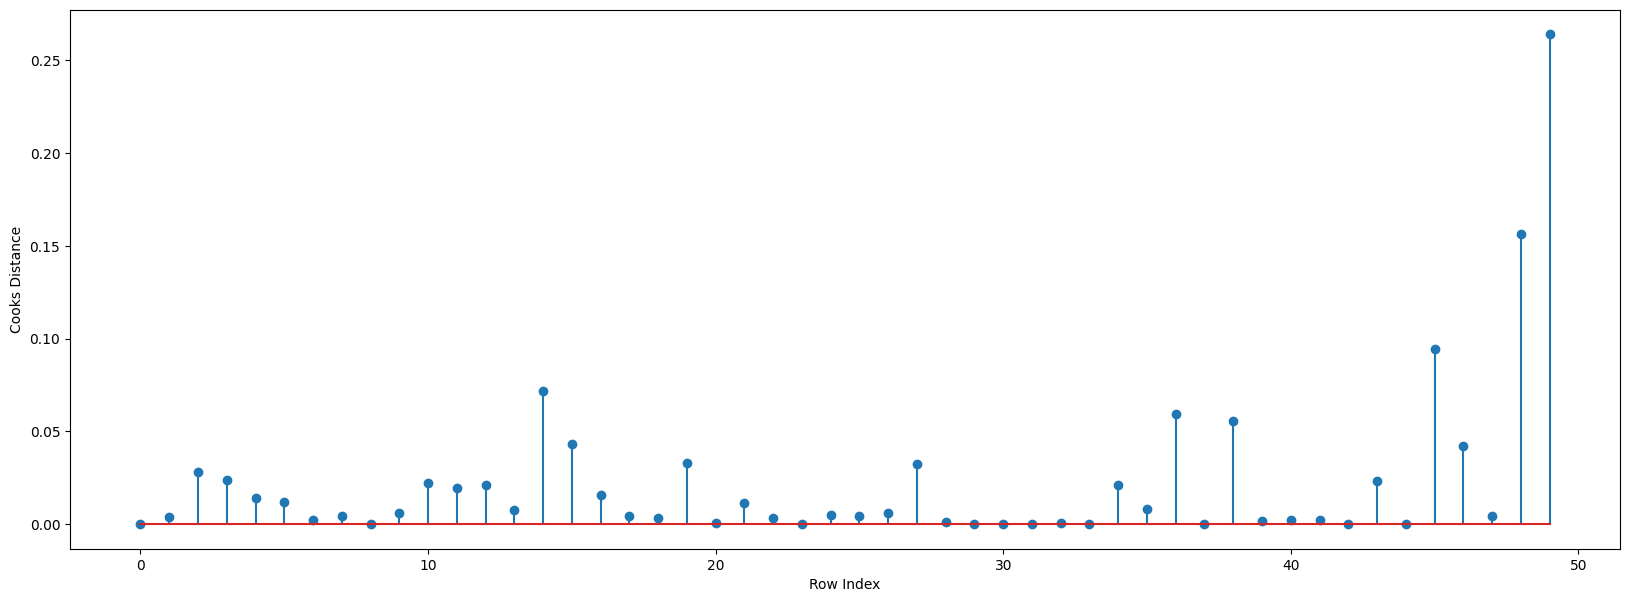

In [36]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2639594358721132)

In [39]:
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df1

,RDSpend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Model Deletion Diagnostics and Final Model

In [42]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDSpend+Administration+Marketing_Spend",data=df1).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(df1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDSpend+Administration+Marketing_Spend",data=df1).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [43]:
final_model.rsquared

0.9613162435129847

In [45]:
pred_y=final_model.predict(df1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [46]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,Final_Model,0.961316
